In [1]:
#  监控调整表三张表的数据情况， 查看有无异常数据

# TODO 添加mongo中刷历史的进度统计

In [1]:

class MysqlConn(object):
    def __init__(self, config_json_str):
        # self.mysql_config = {"host": "10.22.128.150",  "port": 3317, "db": "bigdata", "user": "talend_load",
        #   "passwd": "s9t5gNThn2vqWM7c" , "charset" : "utf8"}
        # self.mysql_config = {"host": "db-bigdata.wmcloud-qa.com",  "port": 3312, "db": "bigdata", "user": "app_bigdata_ro",
        #   "passwd": "Welcome_20141217"}
        self.mysql_config = json.loads(config_json_str, encoding='utf-8')

    def connect(self):
        mysql_conn = pymysql.connect(**self.mysql_config)
        return mysql_conn

class MssqlConn(object):
    def __init__(self, config_json_str):
        # self.mssql_config = {"server": "sh-datayesdb.wmcloud-dev.com",  "port": 1433, "database": "datayesdb",
        #     "user": "talend_load", "password": "Welcome01"}
        self.mssql_config = json.loads(config_json_str, encoding='utf-8')

    def connect(self):
        mssql_conn = pymssql.connect(**self.mssql_config)
        return mssql_conn

    def __str__(self):
        return json.dumps(self.mssql_config, ensure_ascii=False, encoding='utf-8')



In [2]:
import json
import pymysql
import pymssql
# MySQL
bigdata={"host":"security03-dev.datayes.com","port":3306,"user":"talend_load","passwd":"NCph1G9BQT3DuQj","db":"bigdata","charset":"utf8"}
dateyesdbp={"host":"db-datayesdb-ro.wmcloud.com","port":3313,"user":"app_dataqa_ro","passwd":"Welcome20140820","db":"datayesdbp","charset":"utf8"}
datayesdb={"host":"db-datayesdb-ro.wmcloud.com","port":3313,"database":"datayesdb","user":"app_gaea_ro","password":"EQw6WquhnCKPp8Li","charset":"utf8"}
datayesdb = {"server": "10.24.21.202", "port": 1433,
         "database": "datayesdb", "user": "talend_load",
         "password": "Welcome01", "charset": "utf8"}
# researchrpt={"host":"db-researchrpt-ro.wmcloud.com","port":3306,"user":"app_gaea_ro","passwd":"UDVVkvULzakP2048","db":"research_rpt","charset":"utf8"}
# dev
# researchrpt={"host":"10.24.21.34","port":3306,"user":"app_researchrep","passwd":"dG8pqlk5VKOMvDH","db":"research_rpt","charset":"utf8","autocommit":True}
# stg
# researchrpt={"host":"db-researchrpt.wmcloud-stg.com","port":3313,"user":"app_resrpt_rw","passwd":"Wy8tw53XpQfRSukb","db":"research_rpt","charset":"utf8","autocommit":True}
# prd
researchrpt={"host":"db-researchrpt.wmcloud.com","port":3306,"user":"app_researchrep","passwd":"dG8pqlk5VKOMvDH","db":"research_rpt","charset":"utf8","autocommit":True}


datayesdb_conn = MssqlConn(json.dumps(datayesdb)).connect()
# researchrpt_conn = MysqlConn(json.dumps(researchrpt)).connect()

# datayes_conn = MssqlConn(json.dumps(datayes)).connect()


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
sql = """
 select ticker, trade_date, market_value_style from stock_factor_tags  where trade_date = 20180420"""

In [29]:
# sql = """
#  select * from stock_factor_tags  where trade_date = 20180420"""

In [30]:
df1 = pd.read_sql(sql, datayesdb_conn)

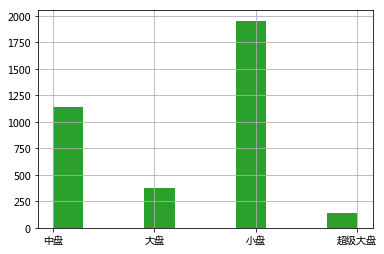

In [22]:
plt.hist(df1.market_value_style)
plt.show()

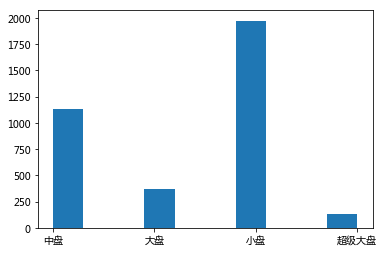

In [31]:
sql = """
 select ticker, trade_date, market_value_style from stock_factor_tags  where trade_date = 20180320"""
df2 = pd.read_sql(sql, datayesdb_conn)
plt.hist(df2.market_value_style)
plt.show()

In [48]:
df = df1.merge(df2, on='ticker')
df['equal'] = False

# df['equal'] = df.apply(lambda x: True if x[market_value_style_x] == x[market_value_style_y])

df[df.market_value_style_x != df.market_value_style_y]

,ticker,trade_date_x,market_value_style_x,trade_date_y,market_value_style_y,equal
23,002246,20180420,小盘,20180320,中盘,False
48,200550,20180420,小盘,20180320,中盘,False
89,600321,20180420,小盘,20180320,中盘,False
106,601366,20180420,中盘,20180320,小盘,False
110,601377,20180420,超级大盘,20180320,大盘,False
128,002285,20180420,中盘,20180320,大盘,False
139,002628,20180420,小盘,20180320,中盘,False
143,002632,20180420,中盘,20180320,小盘,False
157,300133,20180420,中盘,20180320,大盘,False
183,600655,20180420,大盘,20180320,中盘,False


In [49]:
df.head()

,ticker,trade_date_x,market_value_style_x,trade_date_y,market_value_style_y,equal
0,000917,20180420,中盘,20180320,中盘,False
1,000918,20180420,中盘,20180320,中盘,False
2,000919,20180420,小盘,20180320,小盘,False
3,000920,20180420,小盘,20180320,小盘,False
4,000921,20180420,中盘,20180320,中盘,False


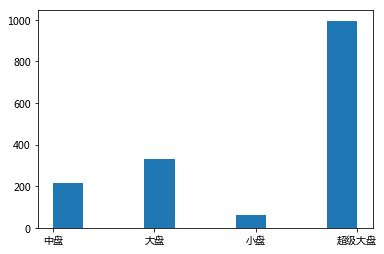

In [25]:
sql = """
 select ticker, trade_date, market_value_style from stock_factor_tags  where ticker = '000861'"""
df = pd.read_sql(sql, datayesdb_conn)
plt.hist(df.market_value_style)
plt.show()

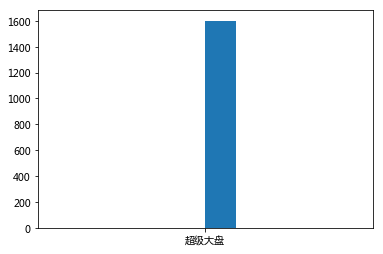

In [26]:
sql = """
 select ticker, trade_date, market_value_style from stock_factor_tags  where ticker = '000001'"""
df = pd.read_sql(sql, datayesdb_conn)
plt.hist(df.market_value_style)
plt.show()

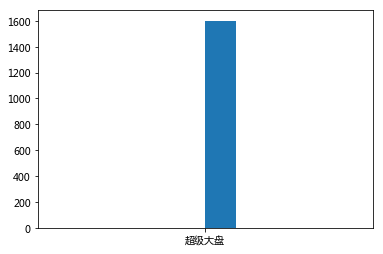

In [27]:
sql = """
 select ticker, trade_date, market_value_style from stock_factor_tags  where ticker = '000002'"""
df = pd.read_sql(sql, datayesdb_conn)
plt.hist(df.market_value_style)
plt.show()

In [5]:
import re
import pymongo
mongo_conn = pymongo.MongoClient(MONGO, connect=False)
mongo_db = mongo_conn.get_database("dataifs")
collection='history_adjust'

# r = mongo_db.solid_pdfs.find_one()
# 总数
# total = mongo_db.solid_pdfs.find().count()
# print total

In [6]:
status=['wait','doing','done']

In [7]:
result = {}
explode = []
for k in status:
    count = mongo_db.get_collection(collection).find({"status" : k}).count()
    result[k] = count
    print(k, count)
    explode.append(0)
# result

('wait', 2020)
('doing', 16)
('done', 1894)


In [8]:
import sys
x='run'
sys.stdout.write(x)

run

# 三个服务wait分别统计

In [9]:
keys=['history_price_adjust','history_rating_adjust','history_profit_adjust']

In [10]:
result = {}
explode = []
for k in keys:
    count = mongo_db.get_collection(collection).find({"status" : 'wait', 'service':k}).count()
    result[k] = count
    print(k, count)
    explode.append(0)
# result

('history_price_adjust', 1009)
('history_rating_adjust', 1011)
('history_profit_adjust', 0)


In [20]:
result = {}
explode = []
for k in keys:
    count = mongo_db.get_collection(collection).find({"status" : 'wait', 'service':k}).count()
    result[k] = count
    print(k, count)
    explode.append(0)
# result

('history_price_adjust', 1009)
('history_rating_adjust', 1010)
('history_profit_adjust', 0)


# 总运行时长

In [12]:
from datetime import datetime
datetime.fromtimestamp(1563157290.01)

datetime.datetime(2019, 7, 15, 10, 21, 30, 10000)

### 最早写入时间

In [13]:
for i in mongo_db.get_collection(collection).find({}).sort([("time1",1)]).limit(1):
    print(datetime.fromtimestamp(i['time1']))

2019-07-20 10:54:41.584241


### 最晚写入时间

In [14]:
for i in mongo_db.get_collection(collection).find({}).sort([("time1",-1)]).limit(1):
    print(datetime.fromtimestamp(i['time1']))

2019-08-02 15:08:18.535324


### 最早处理时间

In [15]:
for i in mongo_db.get_collection(collection).find({}).sort([("time2",1)]).limit(1):
    print(datetime.fromtimestamp(i['time2']))

2019-07-15 09:21:16.216430


### 最晚处理时间

In [16]:
for i in mongo_db.get_collection(collection).find({}).sort([("time2",-1)]).limit(1):
    print(datetime.fromtimestamp(i['time2']))

2019-08-02 15:08:18.532262


In [17]:
# mongo_db.get_collection(collection).aggregate({ "$group" : { "_id": , "max": { "$max" : "$time1" }}});

In [18]:
for i in mongo_db.get_collection(collection).aggregate([{
    "$project":{
        "t1":{"$max":"$time1"}
    }
}]):
#     print(i)

IndentationError: expected an indented block (<ipython-input-18-0fa3d3aea414>, line 6)

In [ ]:
for item in mongo_db.get_collection(collection).find().max('time2'):
    print item

In [ ]:
import json
import pymysql
import pymssql
# MySQL
# QA
# researchrpt={"host":"10.24.21.34","port":3306,"user":"app_researchrep","passwd":"dG8pqlk5VKOMvDH","db":"research_rpt","charset":"utf8"}
# STG
researchrpt={"host":"db-researchrpt.wmcloud-stg.com","port":3313,"user":"app_datarrp_rw","passwd":"H63mXK77X91i5OGDn","db":"research_rpt_prd","charset":"utf8"}
# PRD
# researchrpt={"host":"db-researchrpt.wmcloud.com","port":3306,"user":"app_researchrep","passwd":"dG8pqlk5VKOMvDH","db":"research_rpt","charset":"utf8"}


bigdata={"host":"real-stg01.datayes.com","port":3314,"user":"app_talend_rw","passwd":"KbcwQ32gamVR3sPw","db":"bigdata","charset":"utf8"}


researchrpt_conn = MysqlConn(json.dumps(researchrpt)).connect()



import pandas as pd

In [ ]:
sql="""select * from rr_rating_adjust where THIS_RATING not in (0,1,2,3,5,7) or LAST_RATING not in (0,1,2,3,5,7)"""
pd.read_sql(sql, researchrpt_conn).info()
pd.read_sql(sql, researchrpt_conn).head()

# delete from rr_rating_adjust where THIS_RATING not in (0,1,2,3,5,7) or LAST_RATING not in (0,1,2,3,5,7)

In [ ]:
sql="""
select a.REPORT_ID, a.SEC_NAME AS "调整表中的SEC_NAME" ,b.SEC_NAME FROM rr_rating_adjust AS a, rr_main AS b
WHERE a.REPORT_ID = b.ID AND a.SEC_NAME <> b.SEC_NAME"""
pd.read_sql(sql, researchrpt_conn)

In [ ]:
sql="""
select * from rr_profit_adjust"""
# base_df= pd.read_sql(sql, researchrpt_conn) 

In [ ]:
sql="""
select * from rr_tar_price_adjust"""
# base_df= pd.read_sql(sql, researchrpt_conn) 

In [ ]:
# base_df.head()

In [ ]:
# base_df.groupby('THIS_WRITE_DATE').size()

In [ ]:
sql="""select id from con_stock_income c 
,(
	select stock_code,tdate,rpt_date, insert_time from
	(
	select stock_code,tdate,rpt_date, count(*) as c, min(insert_time)  as insert_time from con_stock_income
	group by stock_code,tdate,rpt_date) a
	where a.c>1 ) b
where b.stock_code=c.stock_code and b.rpt_date=c.rpt_date and b.tdate=c.tdate and c.insert_time>b.insert_time

"""
# base_df= pd.read_sql(sql, researchrpt_conn) 


In [ ]:

sql="""
SELECT a.* FROM rr_tar_price_adjust a, rr_tar_price_adjust b
WHERE a.REPORT_ID = b.REPORT_ID AND a.LAST_WRITE_DATE = b.THIS_WRITE_DATE AND a.LAST_TAR_PRICE <> b.THIS_TAR_PRICE"""

sql="""select * from rr_tar_price_adjust"""
# base_df= pd.read_sql(sql, researchrpt_conn) 

In [ ]:

sql="""
SELECT * FROM rr_main
WHERE SEC_CODE='600009' and ORG_ID=7248"""

pd.read_sql(sql, researchrpt_conn) 

In [ ]:
# base_df[(base_df.ORG_ID==7248) & (base_df.SEC_CODE=='600009')]

In [ ]:
# # 一个机构只对本公司做过一次预测，其上次与本次的目标价应该一致 （4条）
# df=base_df.groupby(['ORG_ID','SEC_CODE']).size().reset_index(name='c')
# idx = df[df.c==1].index
# base_df.iloc[idx][['ORG_ID','SEC_CODE','THIS_WRITE_DATE','LAST_WRITE_DATE','LAST_TAR_PRICE','THIS_TAR_PRICE']]

# # base_df.head()
# df['ORG_ID']=df['ORG_ID'].astype(int)

# dfc = base_df.merge(df.iloc[idx], on=['ORG_ID','SEC_CODE'], how='right')[['ORG_ID','SEC_CODE','THIS_WRITE_DATE','LAST_WRITE_DATE','LAST_TAR_PRICE','THIS_TAR_PRICE']]
# dfc[dfc.LAST_TAR_PRICE != dfc.THIS_TAR_PRICE]

In [ ]:
# 代码不是A股(21条)
sql="""

select *
from rr_tar_price_adjust
where qa_active_flg='1'
and (length(sec_code)<>'6'
or substring(sec_code,1,1) not in ('0','2','3','6','9')
);"""
pd.read_sql(sql, researchrpt_conn)

"""
delete
from rr_tar_price_adjust
where qa_active_flg='1'
and (length(sec_code)<>'6'
or substring(sec_code,1,1) not in ('0','2','3','6','9')
);
"""

In [ ]:

# 证券名称和研报名字不一致（267条,大致浏览了下ID：54195有误）
sql="""
select *
from rr_tar_price_adjust
where qa_active_flg='1'
and (instr(title,sec_name)='0'
or instr(title,sec_code)='0');"""
pd.read_sql(sql, researchrpt_conn).head()

In [ ]:

# 类型不为R04
sql="""select *
from rr_tar_price_adjust
where qa_active_flg='1'
and REPORT_TYPE<>'R04';
"""
# pd.read_sql(sql, researchrpt_conn)

In [ ]:

# 机构名称和机构id不一一对应(无)
sql="""
select a.org_name,a.org_id,b.org_id
from rr_tar_price_adjust a,rr_tar_price_adjust b
where a.qa_active_flg='1'
and b.qa_active_flg='1'
and a.org_name=b.org_name
and a.org_id<>b.org_id;"""

sql="""
select distinct(org_name), org_id from rr_tar_price_adjust"""
# df=pd.read_sql(sql, researchrpt_conn).groupby('org_name').size().reset_index(name='counts')
# df[df.counts>1]

In [ ]:

# 作者和机构不一一对应（10条，但是也有可能是重名）
sql="""
select distinct a.author,a.org_id,b.org_id
from rr_tar_price_adjust a,rr_tar_price_adjust b
where a.qa_active_flg='1'
and b.qa_active_flg='1'
and a.author=b.author
and a.org_id<>b.org_id
order by a.author;
"""

sql="""select distinct author, org_id from rr_tar_price_adjust"""
# df=pd.read_sql(sql, researchrpt_conn).groupby('author').size().reset_index(name='counts')
# df[df.counts>1]

In [ ]:


# 上次撰写日期大于这次/未调不等于0，上调不等于1，下调不等于2,有一为空不为3（1条）
sql="""
select distinct id,report_id,last_write_date,this_write_date,this_tar_price,last_tar_price,tar_price_mark
from rr_tar_price_adjust
where qa_active_flg='1'
and (last_write_date>this_write_date
or (
(this_tar_price>last_tar_price and tar_price_mark<>1)
or (this_tar_price=last_tar_price and tar_price_mark<>0)
or (this_tar_price<last_tar_price and tar_price_mark<>2)
)
or (current_price='' or this_tar_price='' or last_tar_price='' 
and tar_price_mark<>3)
);"""
pd.read_sql(sql, researchrpt_conn)

In [ ]:
# 券商名称不完整
sql="""
SELECT a.REPORT_ID,a.ORG_NAME,b.ORG_NAME from rr_tar_price_adjust a, rr_main b
where a.QA_ACTIVE_FLG=1 and b.QA_ACTIVE_FLG=1
and a.REPORT_ID=b.ID
and (a.ORG_NAME<>b.ORG_NAME)"""
# pd.read_sql(sql, researchrpt_conn)

sql="""select report_id, org_name as a from rr_tar_price_adjust"""
# df1 = pd.read_sql(sql, researchrpt_conn) 

sql = """select id as report_id, org_name as bfrom rr_main"""
# df2 = pd.read_sql(sql, researchrpt_conn) 

# df1.merge(df2, on=['report_id']).apply(lambda x: true if x.a==x.b else false)

In [ ]:
# 同一研报ID，两个表中公司名称不一致（1条）
sql="""
select a.REPORT_ID, a.SEC_NAME AS "目标价调整表中的SEC_NAME" ,b.SEC_NAME FROM rr_tar_price_adjust AS a, rr_main AS b
WHERE a.REPORT_ID = b.ID AND a.SEC_NAME <> b.SEC_NAME"""

# df2 = pd.read_sql(sql, researchrpt_conn) 

In [ ]:
# # 一个机构只对本公司做过一次预测，其上次与本次的目标价应该一致 （4条）
# df=base_df.groupby(['ORG_ID','SEC_CODE']).size().reset_index(name='c')
# idx = df[df.c==1].index
# base_df.iloc[idx][['ORG_ID','SEC_CODE','THIS_WRITE_DATE','LAST_WRITE_DATE','LAST_TAR_PRICE','THIS_TAR_PRICE']]
# # df.head()
# # base_df.head()